# Weather Notebook

![weather](https://www.bigcountryhomepage.com/wp-content/uploads/sites/56/2020/02/Weather-v2.jpg?w=640&h=360&crop=1)

This notebook analysis the weatherreadings csv file in the Data_Files folder of this folder. In specific we are analysing the temperature over time. (dryBulbTemperature_Celcius). Pandas has being used to read in the dataset.

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import dateutil


In [2]:
# Load the dataset

df = pd.read_csv('Data_Files/weatherreadings1.csv')


In [3]:
# Display the first 5 rows of the dataset

df.head()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

In [5]:
#Convert the reportStartDateTime and reportEndDateTime columns to datetime format
df[['reportStartDateTime', 'reportEndDateTime']]= df[['reportStartDateTime', 'reportEndDateTime']].apply(pd.to_datetime)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   siteId                          89 non-null     object             
 1   reportStartDateTime             89 non-null     datetime64[ns, UTC]
 2   reportEndDateTime               89 non-null     datetime64[ns, UTC]
 3   collectionName                  89 non-null     int64              
 4   isPublic                        89 non-null     bool               
 5   isLatestVersion                 89 non-null     bool               
 6   observationType                 89 non-null     int64              
 7   softwareType                    89 non-null     object             
 8   windDirection                   89 non-null     int64              
 9   relativeHumidity                89 non-null     float64            
 10  windSpeed_MilePe

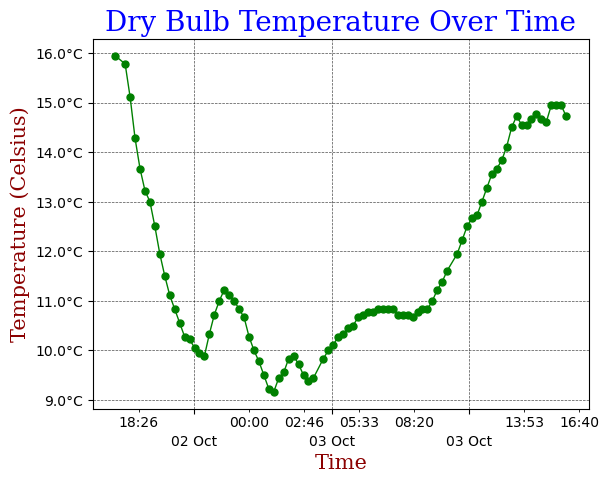

In [22]:
# Display the drybulb temperature column of the dataset over time

# Create a variable to store the drybulb temperature column of the dataset
drybulb = df['dryBulbTemperature_Celsius'].to_list()
df['time'] = df['reportStartDateTime'].apply(lambda x: x.timestamp())
dateTime = df['time'].to_list()

#Set the font style and size for the title and labels
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Create a function to format the temperature values on the y-axis
def temperature_formatter(drybulb, pos):
    s = f"{drybulb}\N{DEGREE SIGN}C"
    return s

def day_formatter(dateTime, pos):
    day = dt.datetime.fromtimestamp(dateTime).strftime('\n%d %b')
    return day

def time_formatter(dateTime, pos):
    time = dt.datetime.fromtimestamp(dateTime).strftime('%H:%M')
    return time

# Create a plot to display the drybulb temperature column of the dataset over time
fig, ax = plt.subplots()

# Set the title, x-axis label, and y-axis label of the plot
ax.set_title('Dry Bulb Temperature Over Time', fontdict = font1)
ax.set_xlabel('Time', fontdict = font2)
ax.set_ylabel('Temperature (Celsius)', fontdict = font2)
# Plot the drybulb temperature column of the dataset over time
ax.plot(dateTime, drybulb, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
# Set the y-axis to display the temperature values in Celsius
ax.yaxis.set_major_formatter(temperature_formatter)
ax.tick_params(axis='x', which='minor', bottom=True, top=False, labelbottom=True, labeltop=False)
ax.xaxis.set_minor_formatter(time_formatter)
ax.xaxis.set_minor_locator(plt.MaxNLocator(10))
ax.xaxis.set_major_formatter(day_formatter)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

# Add gridlines to the plot
ax.grid(linestyle='--', linewidth=0.5, color='black', alpha=0.7) # Add gridlines

# Display the plot
plt.show()

## End